In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#First we generate the piano roll from y_test_pred, that has been predicted by the model
arr = np.load('/content/drive/MyDrive/final2.npy')
print(np.shape(arr))

(7136, 38, 88)


In [30]:
#backtracking to convert 3D array to 2D
X=[]
i=0
for i in range(7136):
  if i==0:
    X=arr[0]
  else:
    X=np.concatenate((X, arr[i]), axis=0)
print(X.shape)

(271168, 88)


In [31]:
#converting boolean to binary matrix with entries 0 and 1
arr2 = np.empty((271168, 88), dtype = int) 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif X[i,j]==True:
            arr2[i,j]=int(1)

         
print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
!pip install midiutil

In [33]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if X[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [34]:
#generate the MIDI file for y_test_pred
with open("output_final.mid", 'wb') as outf:
    mf.writeFile(outf)

In [35]:
!pip install pretty_midi

In [49]:
import pretty_midi
import pandas as pd
path = "output_final.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

          Start         End  Pitch  Velocity Instrument
0        0.0000    0.000521     16       100     Output
1        0.0000    0.004687     23       100     Output
2        0.0000    0.000521     28       100     Output
3        0.0000    0.004687     32       100     Output
4        0.0000    0.000521     35       100     Output
...         ...         ...    ...       ...        ...
65485  124.9875  124.992188     45       100     Output
65486  124.9875  124.992188     48       100     Output
65487  124.9875  124.992188     51       100     Output
65488  124.9875  124.992188     54       100     Output
65489  124.9875  124.992188     57       100     Output

[65490 rows x 5 columns]


From Model


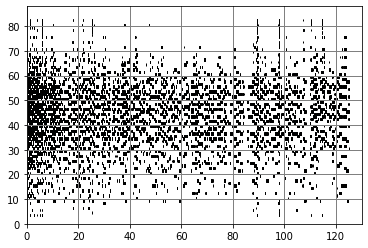

In [50]:
fig, ax = plt.subplots()

i = 0
while(i<65490) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('From Model')
plt.show()

In [38]:
#Now we generate the piano roll from y_test to check if it matches with the prediction
arr3 = np.load('/content/drive/MyDrive/y_test.npy')
arr3=np.squeeze(arr3, axis=-2)
print(np.shape(arr3))

(7136, 38, 88)


In [39]:
#again backtracking to comvert 3D array to 2D
X2=[]
i=0
for i in range(7136):
  if i==0:
    X2=arr3[0]
  else:
    X2=np.concatenate((X2, arr3[i]), axis=0)
print(X2.shape)

(271168, 88)


In [40]:
#converting boolean to binary matrix with entries 0 and 1
arr4 = np.empty((271168, 88), dtype = int) 
for i in range(X2.shape[0]):
    for j in range(X.shape[1]):
        if X2[i,j]==False:
            arr4[i,j]=int(0)
            int(arr4[i,j])
        elif X2[i,j]==True:
            arr4[i,j]=int(1)

         
print(arr4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(np.count_nonzero(arr4))

In [42]:
mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr4.shape[1]):
        if X2[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [43]:
with open("output_final_actual.mid", 'wb') as outf:
    mf.writeFile(outf)

In [44]:
path = "output_final_actual.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.004687     43       100     Output
1        0.000000    0.000521     44       100     Output
2        0.000000    0.000521     48       100     Output
3        0.000000    0.000521     60       100     Output
4        0.000521    0.005208     44       100     Output
...           ...         ...    ...       ...        ...
46431  124.962500  124.967187     49       100     Output
46432  124.962500  124.967187     52       100     Output
46433  124.987500  124.992188     44       100     Output
46434  124.987500  124.992188     49       100     Output
46435  124.987500  124.992188     52       100     Output

[46436 rows x 5 columns]


Actual


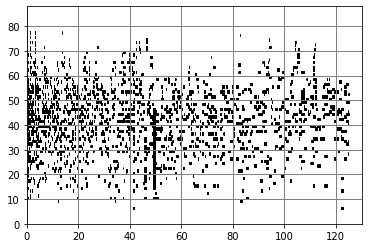

In [46]:
fig, ax = plt.subplots()

i = 0
while(i<46436) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('Actual')
plt.show()